In [3]:
import numpy as np
import magpylib as magpy
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

In [19]:
# Check magpy works.
loop = magpy.current.Loop(current=1, diameter=2)
B = magpy.getB(loop, (1,2,3))
B

array([0.00359186, 0.00718371, 0.00581677])

In [105]:
# Helmholtz coil pair.
# diam [mm]
# position [mm]
# current [A]

def coil_pair_x(winds, dist, diam, curr, width, anti):
    for x in np.linspace(-winds*width/2, winds*width/2, winds):
        w1 = magpy.current.Loop(
            current=curr,
            diameter=diam,
            position=(dist,0,0),
            orientation= R.from_euler('y', 90, degrees=True)
        )

    for x in np.linspace(-winds*width/2, winds*width/2, winds):
        w2 = magpy.current.Loop(
            current=anti*curr,
            diameter=diam,
            position=(-dist,0,0),
            orientation= R.from_euler('y', 90, degrees=True)
        )

    return w1, w2

def coil_pair_y(winds, dist, diam, curr, width, anti):
    for y in np.linspace(-winds*width/2, winds*width/2, winds):
        w1 = magpy.current.Loop(
            current=curr,
            diameter=diam,
            position=(0,dist,0),
            orientation= R.from_euler('x', 90, degrees=True)
        )

    for y in np.linspace(-winds*width/2, winds*width/2, winds):
        w2 = magpy.current.Loop(
            current=anti*curr,
            diameter=diam,
            position=(0,-dist,0),
            orientation= R.from_euler('x', 90, degrees=True)
        )

    return w1, w2

Collection nolabel (id=140296174390544)
├── Loop nolabel (id=140279953051024)
├── Loop nolabel (id=140296162204816)
├── Loop nolabel (id=140296100741328)
└── Loop nolabel (id=140296100741904)


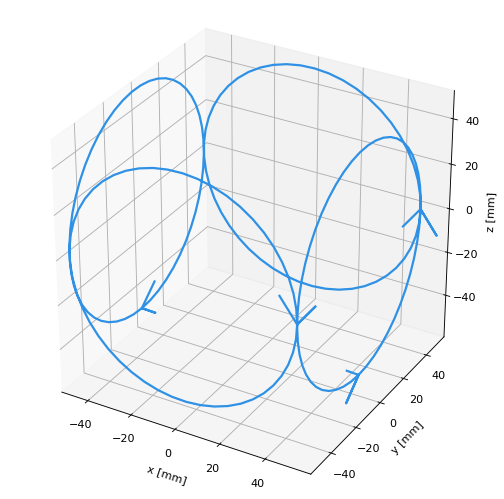

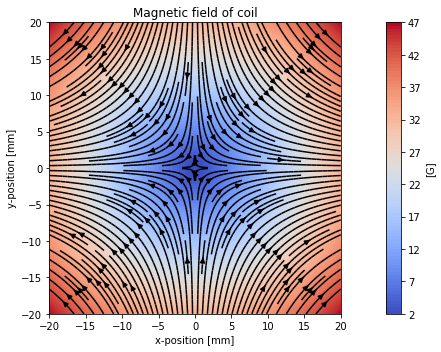

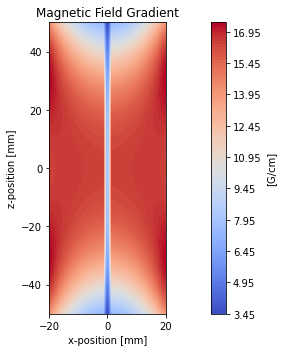

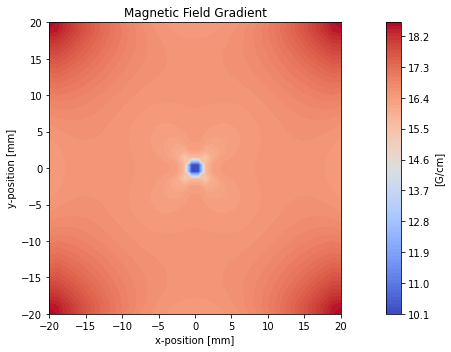

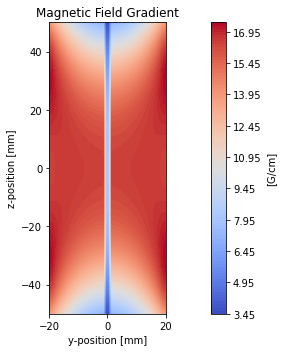

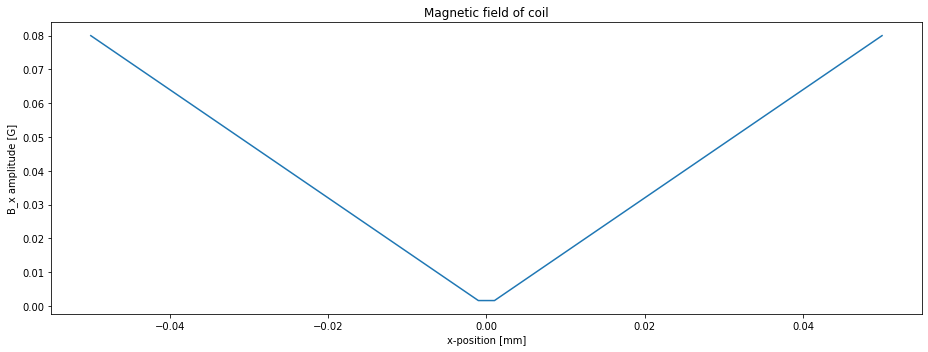

In [120]:
def makeQuadCoil(winds, dist, diam, curr, width, anti):
    quad = magpy.Collection()
    w1, w2 = coil_pair_x(winds, dist, diam, curr, width, anti)
    quad.add(w1)
    quad.add(w2)
    w3, w4 = coil_pair_y(winds, dist, diam, curr, width, anti)
    quad.add(w3)
    quad.add(w4)
    return quad



quadcoil = makeQuadCoil(winds = 10, dist = 50, diam = 100, curr = 400, width = 1, anti = -1)

quadcoil.describe()

quadcoil.show()


# Stream plot
plot_mag_field_xy(quadcoil)

# xz plane,
plot_grad_xz(quadcoil)

# xy plane, z=z
plot_grad_xy(quadcoil, z=0)

# yz plane, z=z
plot_grad_yz(quadcoil, x=0)

# amplitude
plot_mag_amp_line(quadcoil, z=0)

In [124]:
magpy.getB(quadcoil, (15,15,0))

array([ 2.43338284e+00, -2.43338284e+00,  6.29052004e-16])

In [119]:
def plot_mag_field_xy(coil1):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 20)
    grid = np.array([[(x,y,0) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,1], B[:,:,0], B[:,:,1],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    plt.show()
    
def plot_mag_amp_line(coil1,z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    ts = np.linspace(-.05, .05, 50)
    grid = np.array([(x,0,z) for x in ts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10
    axs.plot(grid[:,0],Bamp)
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='B_x amplitude [G]',
    )
    plt.tight_layout()
    plt.show()
    
def plot_grad_xz(coil1):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    zts = np.linspace(-50, 50, 100)
    grid = np.array([[(x,0,z) for x in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,2], np.linalg.norm(np.gradient(Bamp),axis=0) * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Gradient',
        xlabel='x-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G/cm]')
    plt.tight_layout()
    plt.show()
    
def plot_grad_yz(coil1, x):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    zts = np.linspace(-50, 50, 100)
    grid = np.array([[(x,y,z) for y in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,1], grid[:,:,2], np.linalg.norm(np.gradient(Bamp),axis=0) * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Gradient',
        xlabel='y-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G/cm]')
    plt.tight_layout()
    plt.show()
    
    
def plot_grad_xy(coil1, z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-20, 20, 40)
    grid = np.array([[(x,y,z) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], np.linalg.norm(np.gradient(Bamp),axis=0) * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Gradient',
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G/cm]')
    plt.tight_layout()
    plt.show()

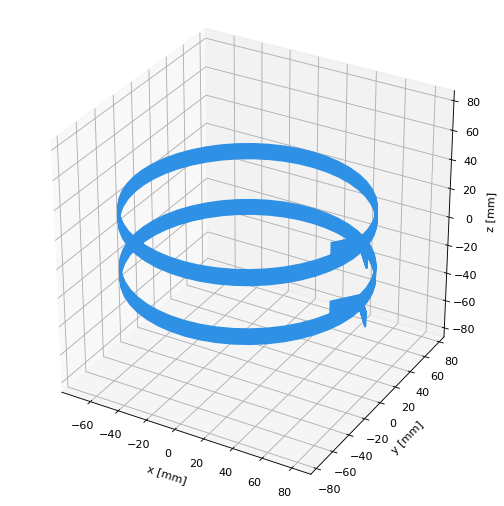

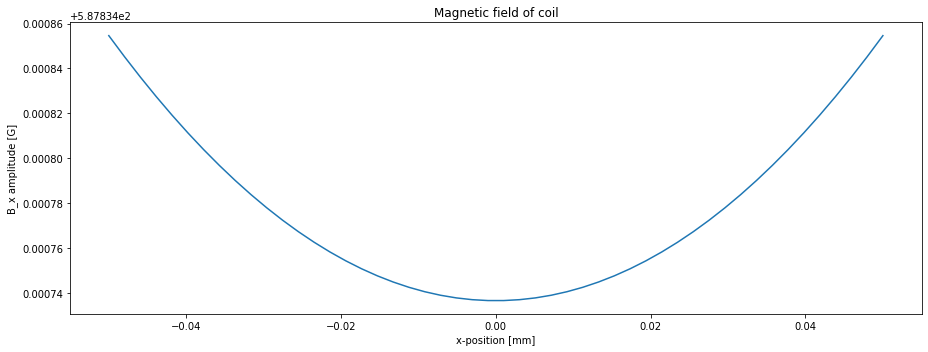

In [8]:
coil2 = coil_pair(10, 20, 155, 400, 1, 1)
coil2.show()
# plot_mag_field(coil2)
plot_mag_amp_line(coil2,0)

In [9]:
def coil_feshbach(winds, dist, diam, curr, xwidth, zwidth):
    # dist, diam, width in mm; curr in A,
    coil = magpy.Collection()
    for y in range(winds):
        for x in range(3):
            winding = magpy.current.Loop(
                current=curr,
                diameter=diam+y*zwidth+x*xwidth,
                position=(0,y*zwidth+dist,0),
                orientation= R.from_euler('x', 90, degrees=True)
            )
            coil.add(winding)

    for y in range(winds):
        for x in range(3):
            winding = magpy.current.Loop(
                current=curr,
                diameter=diam+y*zwidth+x*xwidth,
                position=(0,-y*zwidth-dist,0),
                orientation= R.from_euler('x', 90, degrees=True)
            )
            coil.add(winding)

    return coil

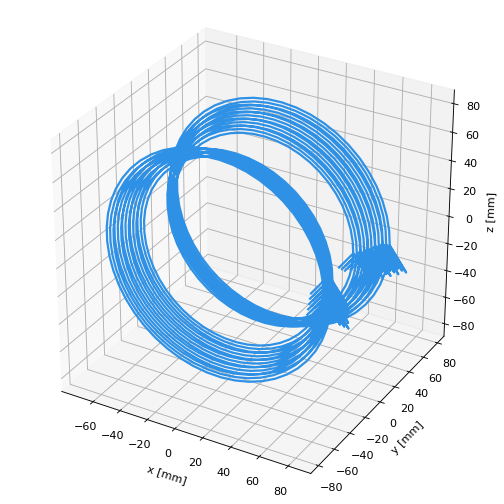

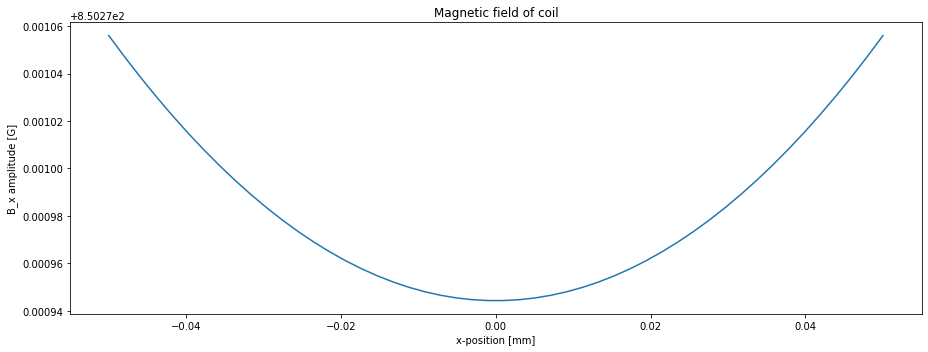

In [10]:
fcoil = coil_feshbach(5, 18, 130, 400, 5, 5)
fcoil.show()
# plot_mag_field(coil2)
plot_mag_amp_line(fcoil,0)

In [11]:
def coil_mot(winds, dist, diam, curr, width):
    coil = magpy.Collection()
    for z in np.linspace(0, winds*width, winds):
        winding = magpy.current.Loop(
            current=curr,
            diameter=diam,
            position=(0,0,z+dist),
        )
        coil.add(winding)

    for z in np.linspace(-winds*width, 0, winds):
        winding = magpy.current.Loop(
            current=-curr,
            diameter=diam,
            position=(0,0,z-dist),
        )
        coil.add(winding)

    return coil

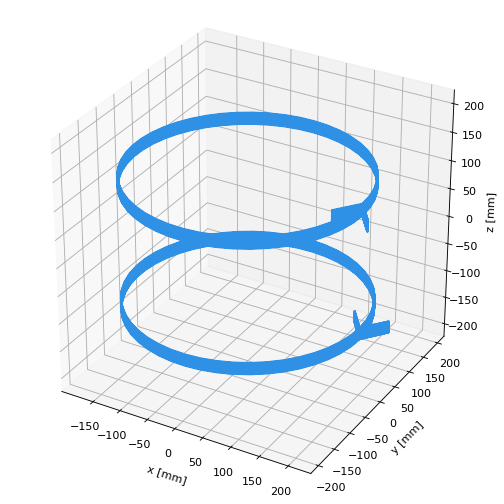

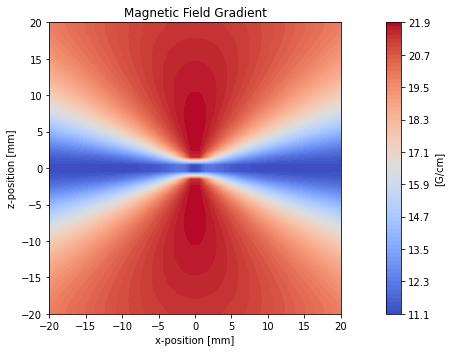

In [12]:
d = 100
mcoil = coil_mot(20, d, 4*d, 400, 1)
mcoil.show()
# plot_mag_field(coil1)
plot_grad(mcoil)

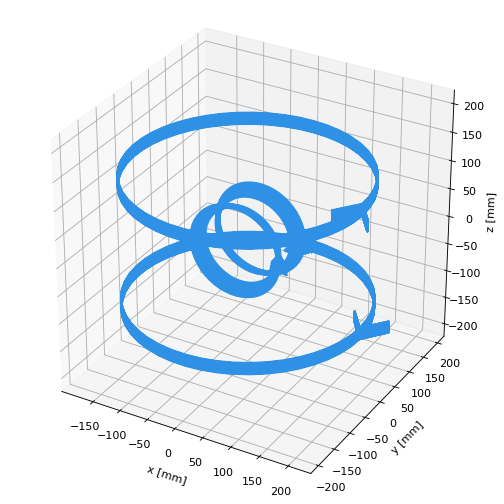

In [13]:
fcoil = coil_feshbach(5, 20, 130, 400, 5, 5)
mcoil = coil_mot(20, d, 4*d, 400, 1)
coils = mcoil+fcoil
coils.show()